In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


데이터 준비


# 디렉토리 만들기
$ mkdir -p ~/aiffel/rock_scissor_paper/scissor
$ mkdir -p ~/aiffel/rock_scissor_paper/rock
$ mkdir -p ~/aiffel/rock_scissor_paper/paper

$ ls -l ~/aiffel/rock_scissor_paper

aiffel
└── rock_scissor_paper
    ├── rock
        └── rock.zip
    ├── scissor
        └── scissor.zip
    └── paper
        └── paper.zip

# 원하는 디렉토리로 이동 =3
$ cd  ~/aiffel/rock_scissor_paper/rock

# 압축 해제 명령어 : unzip <파일명>.zip
$ unzip rock.zip

# 가위, 보에 대해서도 똑같이 실행!
$ cd  ~/aiffel/rock_scissor_paper/scissor
$ unzip scissor.zip

$ cd  ~/aiffel/rock_scissor_paper/paper
$ unzip paper.zip

In [2]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
# [[YOUR CODE]]

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]

100  images to be resized.
100  images resized.


In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
# [[YOUR CODE]]

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]

100  images to be resized.
100  images resized.


In [6]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


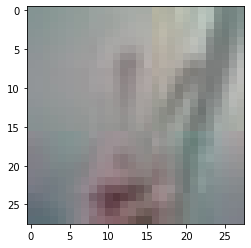

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

딥러닝 네트워크 설계하기


In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                204864    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

딥러닝 네트워크 학습시키기

In [11]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train , epochs=10)

Epoch 1/10
10/10 [==============================] - 3s 14ms/step - loss: 1.1122 - accuracy: 0.3500
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 1.1010 - accuracy: 0.2967
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 1.0975 - accuracy: 0.3500
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0967 - accuracy: 0.3333
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0933 - accuracy: 0.3933
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0894 - accuracy: 0.4700
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0841 - accuracy: 0.4300
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0757 - accuracy: 0.5900
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0572 - accuracy: 0.5067
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0546 - accuracy: 0.4233


얼마나 잘 만들었는지 확인하기(테스트)

In [12]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]


# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]
def load_test(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=900   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels=np.zeros(number_of_data, dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    return imgs, labels

테스트용 데이터가 준비되었으니, 위에서 훈련시킨 model을 사용하여 test_accuracy를 측정해 봅시다.


In [13]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]

test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
print(test_image_dir_path)

# scissor
t_s_images=glob.glob(test_image_dir_path + "/scissor/*.jpg")  
target_size=(28,28)
for img in t_s_images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

# rock
t_r_images=glob.glob(test_image_dir_path + "/rock/*.jpg")  
target_size=(28,28)
for img in t_r_images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")
 
print("바위 이미지 resize 완료!")

# paper
t_p_images=glob.glob(test_image_dir_path + "/paper/*.jpg")  
target_size=(28,28)
for img in t_p_images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")
 
print("바위 이미지 resize 완료!")


(x_test, y_test)=load_test(test_image_dir_path)
x_test_norm = x_test/255.0

print(x_test.shape)

/aiffel/aiffel/rock_scissor_paper/test
가위 이미지 resize 완료!
바위 이미지 resize 완료!
바위 이미지 resize 완료!
(900, 28, 28, 3)


Model Test 하기

In [14]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

29/29 - 0s - loss: 1.0904 - accuracy: 0.7889
test_loss: 1.0903555154800415 
test_accuracy: 0.7888888716697693


회고
손글씨 분류를 통해서 선행 학습을 통해서 인지하고. 가위, 바위, 보 분류를 시도하였습니다.

데이터셋
Train - 300 장

scissor : 100 장
rock : 100 장
paper : 100 장

Test - 300 장

scissor : 100 장
rock : 100 장
paper : 100 장
이 데이터셋을 학습하고 테스트 했을 때는 성능이 좋지 않았습니다.  test acc 는 약 0.0.889 정도 였습니다.
 reference : 
https://github.com/JaeHeee/AIFFEL_Project/blob/master/EXPLORATION/EXPLORATION%201.%20%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B3%BC%20%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4%20%ED%95%98%EA%B8%B0.ipynb
